In [1]:
%matplotlib inline
import numpy as np
from nsampling import NestedSampling, Uniform, Normal
from functools import partial

## The Lighthouse Problem

In [2]:
data = [4.73, 0.45, -1.73, 1.09, 2.19, 0.12,
        1.31, 1.00, 1.32, 1.07, 0.86, -0.49, -2.59, 1.73, 2.11,
        1.61, 4.98, 1.71, 2.23, -57.20, 0.96, 1.25, -1.56, 2.45,
        1.19, 2.17, -10.66, 1.91, -4.16, 1.92, 0.10, 1.98, -2.51,
        5.55, -0.47, 1.91, 0.95, -0.78, -0.84, 1.72, -0.01, 1.48,
        2.70, 1.21, 4.41, -4.79, 1.33, 0.81, 0.20, 1.58, 1.29,
        16.19, 2.75, -2.38, -1.79, 6.50, -18.53, 0.72, 0.94, 3.64,
        1.94, -0.11, 1.57, 0.57]

In [3]:
def likelihood(vals, data):
    x = vals[0]
    y = vals[1]
    N = len(data)
    logL = 0
    if y < 0.:
        raise SamplingException()
    for k in range(0, N):
        logL += np.log((y / np.pi) /
                       ((data[k] - x) * (data[k] - x) + y * y))
    return logL

In [66]:
x = Uniform('x', -2., 2.)
y = Uniform('y', 0., 2.)
ns = NestedSampling()
lh = partial(likelihood, data=data)
rs = ns.explore(vars=[x, y], initial_samples=100,
                maximum_steps=1000, 
                likelihood=lh, tolZ=1.e-4)

Text(0.5,0,'Sample #')

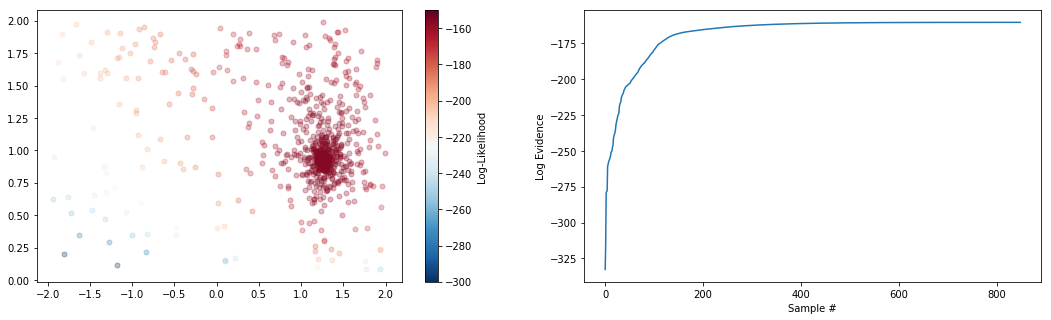

In [73]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.colors import Normalize
cmap = cm.ScalarMappable(norm=Normalize(vmin=-300, vmax=-150), cmap='RdBu_r')
logLs = []
smp = rs.get_samples()
xs = []
ys = []
wt = []
h = []
z = []
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
for _s in smp:
    cl = cmap.to_rgba(_s.get_logL())
    logLs.append(_s.get_logL())
    x1, y1 = _s.get_value()
    xs.append(x1)
    ys.append(y1)
    wt.append(_s.get_logWt())
    z.append(_s.get_logZ())
    h.append(_s.get_H())
    axs[0].plot(x1,y1,ms=5,color=cl,marker='o',alpha=0.3)
cmap.set_array(logLs)
cb = plt.colorbar(cmap, ax=axs[0])
cb.set_label('Log-Likelihood')
axs[1].plot(z)
axs[1].set_ylabel('Log Evidence')
axs[1].set_xlabel('Sample #')

## Himmelblau's function

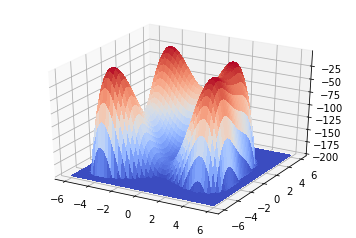

In [74]:
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(-6.,6.,1000)
y = np.linspace(-6.,6.,1000)
X, Y = np.meshgrid(x, y)
Z = -((X**2 + Y - 11.)**2 + (X + Y**2 -7)**2)
Z = np.where(Z < -200, -200, Z)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [75]:
x_ns = Uniform('x_ns', -5., 5.)
y_ns = Uniform('y_ns', -5., 5.)

def Himmelblau(vals):
    x = vals[0]
    y = vals[1]
    return -((x**2 + y - 11.)**2 + (x + y**2 -7)**2)

In [76]:
ns_hb = NestedSampling()
rs = ns_hb.explore([x_ns, y_ns], 100, 1000, Himmelblau, 20, 0.2, 0.01)

Text(0.5,0,'Sample #')

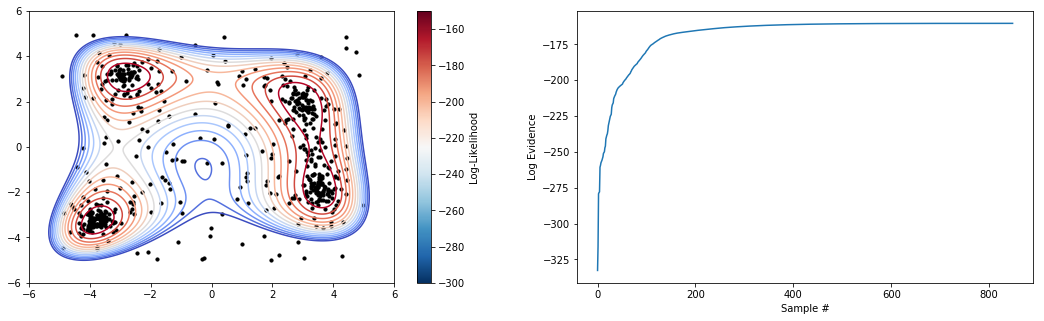

In [77]:
smp = rs.get_samples()
x_rs = []
y_rs = []
z_rs = []
for _s in smp:
    z_rs.append(_s.get_logZ())
    x,y = _s.get_value()
    x_rs.append(x)
    y_rs.append(y)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
surf = axs[0].contour(X, Y, Z, 15, cmap=cm.coolwarm)
axs[0].scatter(x_rs, y_rs, s=10, color='k')
axs[0].set_ylim(-6,6)
axs[0].set_xlim(-6,6)
cb = plt.colorbar(cmap, ax=axs[0])
cb.set_label('Log-Likelihood')
axs[1].plot(z)
axs[1].set_ylabel('Log Evidence')
axs[1].set_xlabel('Sample #')

## Grammacy & Lee function

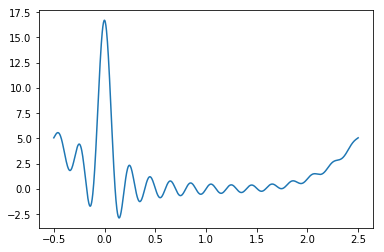

In [23]:
x = np.linspace(-0.5, 2.5, 1000)
y = np.sin(10.*np.pi*x)/(2*x) + (x -1)**4
plt.plot(x,y)

In [24]:
def GandL(vals):
    x = vals[0]
    return np.sin(10.*np.pi*x)/(2*x) + (x -1)**4

In [25]:
x_gl = Uniform('x', -.5, 2.5)
ns_gl = NestedSampling()
rs_gl = ns_gl.explore([x_gl], 100, 1000, GandL, 20, 0.2)

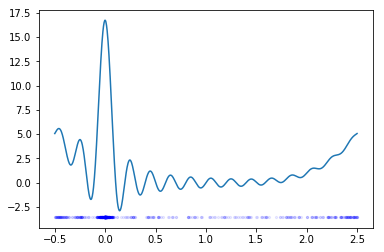

In [26]:
smp = rs_gl.get_samples()
x_rs = []
z_rs = []
for _s in smp:
    z_rs.append(_s.get_logL())
    x_tmp = _s.get_value()
    x_rs.append(x_tmp[0])
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(x,y)
ax1.scatter(x_rs, -3.5*np.ones(len(x_rs)),
            color='b', s=5, alpha=0.08)


## Wolfe Function

In [52]:
x_w = Uniform('x', 0., 2.)
y_w = Uniform('y', 0., 2.)
z_w = Uniform('z', 0., 2.)

def Wolfe(vals):
    x = vals[0]
    y = vals[1]
    z = vals[2]
    return -1*(4./3.*(x**2 + y**2 + x*y)**(0.75) + z)

In [61]:
ns_w = NestedSampling()
rs_w = ns_w.explore([x_w, y_w, z_w], 50, 5000, Wolfe, 20, 0.2, 1e-10)

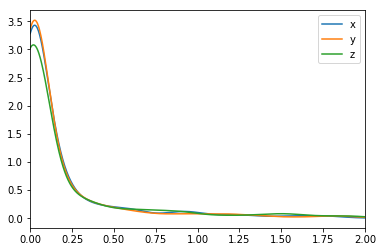

In [62]:
from scipy.stats import gaussian_kde
smp = rs_w.get_samples()
x_rs = []
y_rs = []
z_rs = []
ev = []
for _s in smp:
    x, y, z = _s.get_value()
    x_rs.append(x)
    y_rs.append(y)
    z_rs.append(z)
    ev.append(_s.get_logZ())
k1 = gaussian_kde(x_rs)
k2 = gaussian_kde(y_rs)
k3 = gaussian_kde(z_rs)
positions = np.linspace(0., 2., 1000)
y_k1 = k1(positions)
y_k2 = k2(positions)
y_k3 = k3(positions)
plt.plot(positions, y_k1, label='x')
plt.plot(positions, y_k2, label='y')
plt.plot(positions, y_k3, label='z')
plt.xlim(0,2)
plt.legend()